Проект 

гипотеза : зависимость между погодой и музыкой. точнее между погодой и параметром danceability.
итог : гипотеза отвергается




In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway


from plotly import tools

In [242]:
data = pd.read_csv('/Users/andrejkuzmin/Downloads/final_spotify.csv')
data

,Unnamed: 0,region,date,month,spotify_id,artist,track_name,position,streams,danceability,...,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
0,0,AUT,2019-01-02,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35174,0.78,...,0.48,100.08,0.26,1.0,-5,1,1,48,69,1
1,1,AUT,2019-01-03,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,34237,0.78,...,0.48,100.08,0.26,1.0,-3,1,1,91,70,1
2,2,AUT,2019-01-04,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,35199,0.78,...,0.48,100.08,0.26,1.0,-2,0,0,14,75,1
3,3,AUT,2019-01-05,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,32559,0.78,...,0.48,100.08,0.26,1.0,0,0,0,47,80,1
4,4,AUT,2019-01-06,1,7KPGeiXWDsGEvFK62wzU8E,Capital Bra,Benzema,1,26956,0.78,...,0.48,100.08,0.26,1.0,0,1,0,80,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425904,1437643,SVK,2019-12-24,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,...,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1425905,1437644,SVK,2019-12-25,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,...,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1425906,1437645,SVK,2019-12-26,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,...,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1425907,1437646,SVK,2019-12-31,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,...,0.09,146.47,0.37,0.0,4,1,0,90,88,1


чтение и просмотр данных. Видно, что у нас есть 3 категории данных : время-дата, музыка,погода.
индексы не совпадают с количеством элементов. Я просмотрел данные, и немного странные . Например, за  6901 а следующее идет 7087. И судя по тому, что количество строк и индекс отличается на ~20к то это не единственное место, где так. Поэтому, для более правильного индексирование нужно сделать команду ниже.

In [32]:
data = pd.read_csv('/Users/andrejkuzmin/Downloads/final_spotify.csv')
del data['Unnamed: 0']
data.tail()

,region,date,month,spotify_id,artist,track_name,position,streams,danceability,energy,...,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
1425904,SVK,2019-12-24,12,5mdNRmqCc8052dYppz1RQn,Jaromír Vomáčka,Veselé Vánoce,199,1973,0.80,0.69,...,0.82,125.82,0.80,0.0,6,1,0,84,82,1
1425905,SVK,2019-12-25,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,137,1396,0.91,0.71,...,0.17,91.00,0.78,1.0,4,1,0,96,89,1
1425906,SVK,2019-12-26,12,49qXO5HuAmm2MFJfqaTDWw,Rida Radar,Outro,196,1200,0.91,0.71,...,0.17,91.00,0.78,1.0,4,1,0,91,79,1
1425907,SVK,2019-12-31,12,5SZn6pPcWotYJ9NxEElWbS,Karol Duchoň,Čardáš dvoch,131,1680,0.41,0.86,...,0.09,146.47,0.37,0.0,4,1,0,90,88,1
1425908,SVK,2019-12-31,12,4rC81ekhtVPM6PtZRPFbZ4,Romstar Vyškov,Kde si včera bol,155,1559,0.77,0.95,...,0.52,145.18,0.86,0.0,4,1,0,90,88,1


In [12]:
data.shape

(1425909, 25)

размер : 25 колонок, 1425909 - строк 
совпадает с количеством на kaggle , поэтому прочтение верное .
в дальнейшем можно использовать, когда нужен размер нашего dataframe.


In [13]:
data.describe().round(3)

,month,position,streams,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,acousticness,tempo,valence,explicit,temp,rain,snow,cloud,humidity,const
count,1425909.000,1425909.000,1425909.00,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425907.000,1425909.000,1425909.000,1425909.000,1425909.000,1425909.000,1425909.0
mean,6.558,99.121,31404.62,0.693,0.641,0.009,5.414,0.169,-6.445,0.126,0.252,120.053,0.495,0.346,13.329,0.404,0.054,30.117,56.487,1.0
std,3.441,57.420,54011.76,0.134,0.159,0.056,3.567,0.129,2.434,0.108,0.235,28.036,0.213,0.476,8.627,0.491,0.225,25.827,15.864,0.0
min,1.000,1.000,1001.00,0.000,0.000,0.000,0.000,0.010,-43.990,0.000,0.000,0.000,0.000,0.000,-18.000,0.000,0.000,0.000,22.000,1.0
25%,4.000,49.000,4951.00,0.610,0.540,0.000,2.000,0.090,-7.520,0.050,0.060,97.990,0.330,0.000,6.000,0.000,0.000,8.000,46.000,1.0
50%,7.000,98.000,12093.00,0.710,0.660,0.000,6.000,0.120,-6.100,0.080,0.180,118.030,0.490,0.000,14.000,0.000,0.000,22.000,55.000,1.0
75%,10.000,148.000,37839.00,0.790,0.760,0.000,8.000,0.190,-4.860,0.180,0.370,137.020,0.650,1.000,21.000,1.000,0.000,48.000,66.000,1.0
max,12.000,200.000,1964217.00,0.980,1.000,0.980,11.000,0.990,-0.790,0.950,1.000,232.690,0.990,1.000,31.000,1.000,1.000,100.000,97.000,1.0


здесь представлены некоторые статистические данные по числовым столбцам. По некоторым из них, смысловой нагрузки нет (например month - среднее значение или дисперсия, к примеру,  естественно не уместны.)

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425909 entries, 0 to 1425908
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   region            1425909 non-null  object 
 1   date              1425909 non-null  object 
 2   month             1425909 non-null  int64  
 3   spotify_id        1425907 non-null  object 
 4   artist            1425879 non-null  object 
 5   track_name        1425880 non-null  object 
 6   position          1425909 non-null  int64  
 7   streams           1425909 non-null  int64  
 8   danceability      1425907 non-null  float64
 9   energy            1425907 non-null  float64
 10  instrumentalness  1425907 non-null  float64
 11  key               1425907 non-null  float64
 12  liveness          1425907 non-null  float64
 13  loudness          1425907 non-null  float64
 14  speechiness       1425907 non-null  float64
 15  acousticness      1425907 non-null  float64
 16  

пустых столбцов нет. Типы : числовые(int/float) и object. уже по количеству видно, что есть пробелы(non-Null не всегда число строк(1425909). Опять же ,сравнивая эти же значения, можно увидеть, что пустых значений немного(1425... есть у всех,  да и максимальный пропуск порядка 30 всего значений.) Для достоверности данных их можно удалить. Они роли не сыграют. 



In [15]:

print(data.duplicated().sum())
if True in data.duplicated().values:
    print('есть дубликаты')
else:
    print('нет дубликатов')
    
        
    
    
        
    
    
        

0
нет дубликатов


дубликатов нет. метод duplicated() возвращает series c True/False значениями . сделал двумя способами.

In [16]:
print(data.isnull().sum())
for i in data.columns:
    if data[i].isnull().sum() !=0:
        print(i,data.loc[data[i].isnull() == True].index,'\n')

        
        
     

        
    



region               0
date                 0
month                0
spotify_id           2
artist              30
track_name          29
position             0
streams              0
danceability         2
energy               2
instrumentalness     2
key                  2
liveness             2
loudness             2
speechiness          2
acousticness         2
tempo                2
valence              2
explicit             2
temp                 0
rain                 0
snow                 0
cloud                0
humidity             0
const                0
dtype: int64
spotify_id Int64Index([507888, 507889], dtype='int64') 

artist Int64Index([ 507888,  507889, 1023727, 1023728, 1023729, 1023730, 1023731,
            1023732, 1023733, 1023734, 1023735, 1023736, 1023737, 1023738,
            1023739, 1023740, 1023741, 1023742, 1023743, 1023744, 1023745,
            1023746, 1023747, 1023748, 1023749, 1023750, 1023751, 1023752,
            1023753, 1282385],
           dtype=

мы видим, что данных по музыке нет в 507888 и 507889 строках . Также , есть строки где нет артистов, поэтому мы должны их удалить. Решил посмотреть индексы, чтобы понять , много ли строк с большим количеством пропусков. Описание удаление  ниже. Интересный факт из анализа данной ячейки : есть строка, где нет артиста но есть песня(30 пропусков по artists, 29 по трэкам)

In [140]:
data = data.dropna(how = 'any')
data.shape

(1425879, 26)

так как у нас немного пропусков, то мы можем удалить их. Что и является один из решением данной проблемы. Так как самое большое количество пропусков в artist и мы не можем , допустим, написать среднее по артисту, или илюбое другое значение , то мы их просто удаляем. Что логично, что число теперь строчек совпадает с числом наименьшим без
нулов(artists)

In [18]:
categ_col = [c for c in data.columns if data[c].dtype.name == 'object']
numer_col   = [c for c in data.columns if data[c].dtype.name != 'object']
print ('Категориальные признаки: ',categ_col)
print ('числовые признаки: ',numer_col)

Категориальные признаки:  ['region', 'date', 'spotify_id', 'artist', 'track_name']
числовые признаки:  ['month', 'position', 'streams', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'acousticness', 'tempo', 'valence', 'explicit', 'temp', 'rain', 'snow', 'cloud', 'humidity', 'const']


так же, можно отнести к категориальным данным из числовых такие как, к примеру, rain или snow(либо 0 либо 1). Также, логично , что month  относится к категориальному признаку по смыслу. 

Так как в наших данных и погода, и музыка, я решил посмотреть есть ли какие нибудь зависимости между этими категориями.

<AxesSubplot:>

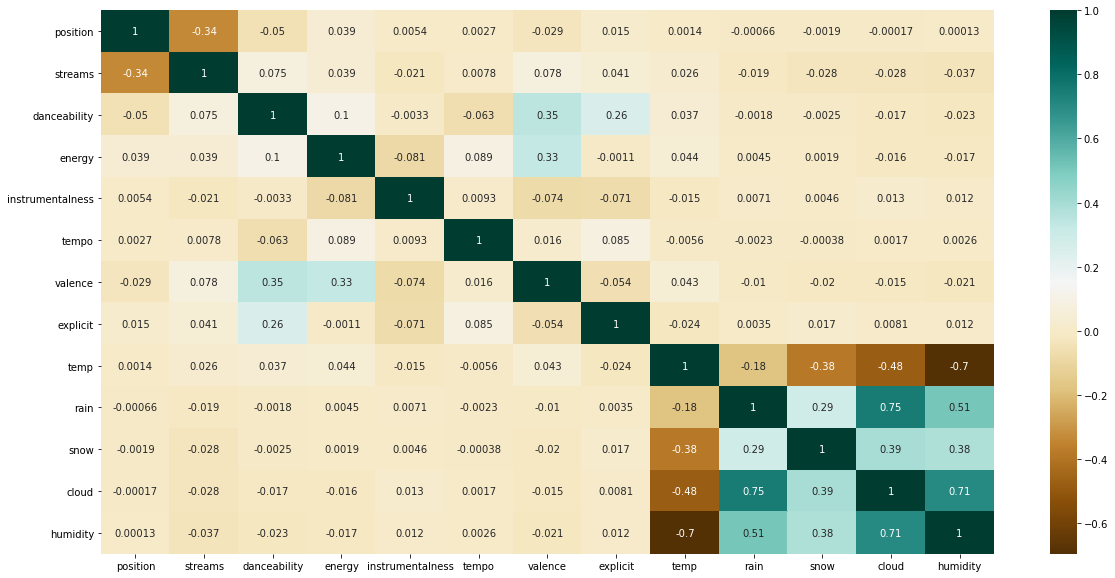

In [19]:
plt.figure(figsize=(20,10))
c= data[['position','streams','danceability','energy','instrumentalness','tempo','valence','explicit','temp','rain','snow','cloud','humidity']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

зависимости на первый взгляд у музыки и погоды нет. Посмотрев меньшее количество и по смыслу потенциально коррелирующие признаки, все равно зависимости не выявлено. Возможно, если поделить на какие-то категории а не конкретные значения  по погоде и/или по музыке, то можно получить значения более зависимые. 

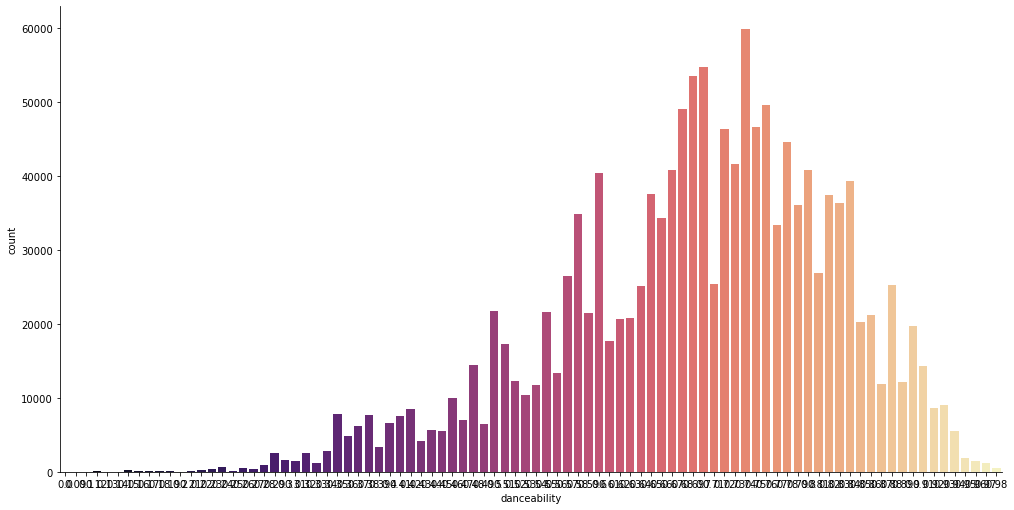

In [20]:
sns.catplot(x="danceability", kind="count",palette="magma", data=data, height = 7,aspect=2) 

Посмотрел распределение параметра danceability, можно увидеть , что распределние нормальное

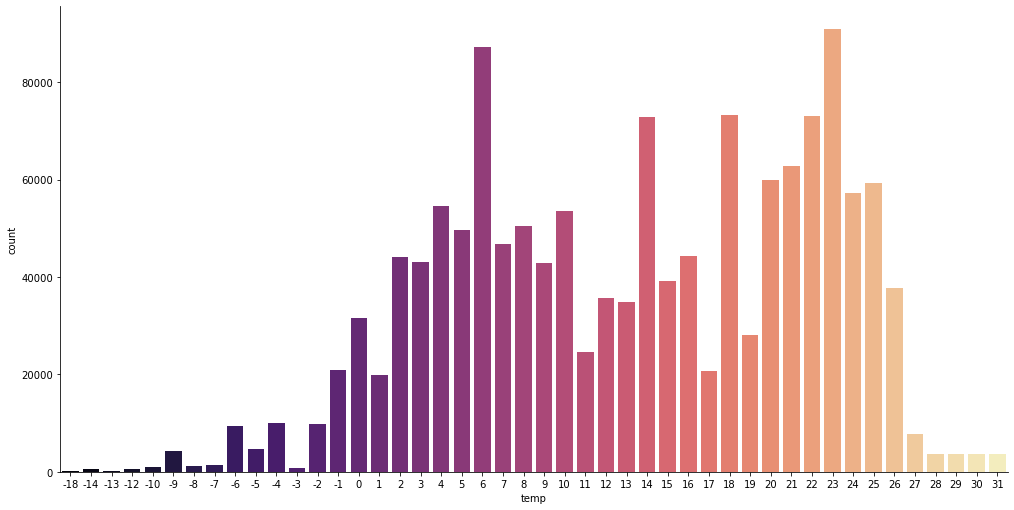

In [21]:
sns.catplot(x="temp", kind="count",palette="magma", data=data, height = 7,aspect=2) 

график распределения температур. Ниже , я сделал еще распределение для weather. Это тоже температура, 
но я поделил по категориям.

In [263]:
data['weather'] = np.where(data['temp'] <= 0,'cold',
                             np.where(np.logical_and(data['temp'] > 0,data['temp'] <= 15),'cool',
                                     np.where(np.logical_and(data['temp'] >15,data['temp'] <=25),'warm','hot')))



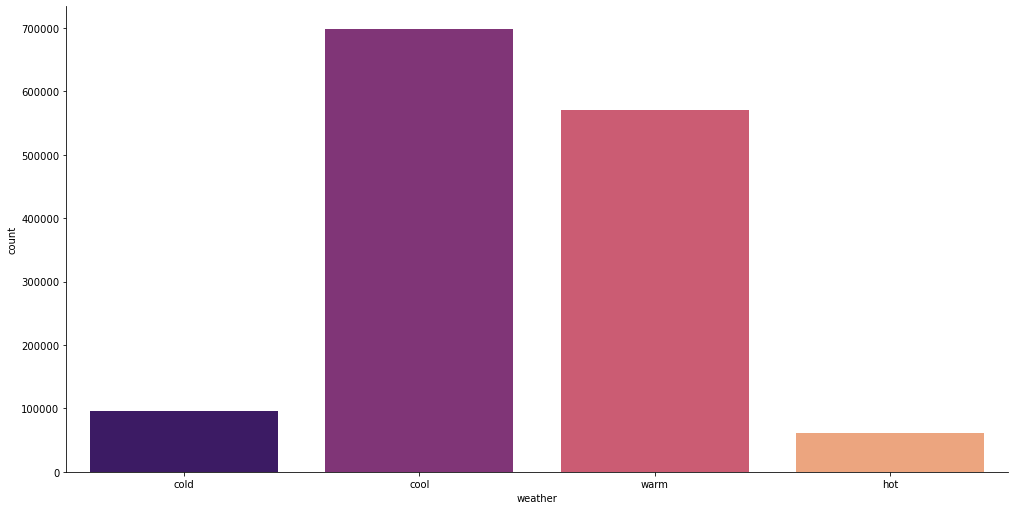

In [23]:
sns.catplot(x="weather", kind="count",palette="magma", data=data, height = 7,aspect=2) 

Выше решил посмотреть распределение температур. Сгруппировал для удобства. 
В целом, наш регион Европа, и видно, что распределение таково, что в основном температура средняя. 
Т.о. для Европы результаты интуинтивно верные. 

/Users/andrejkuzmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/andrejkuzmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/Users/andrejkuzmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/andrejkuzmin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWa

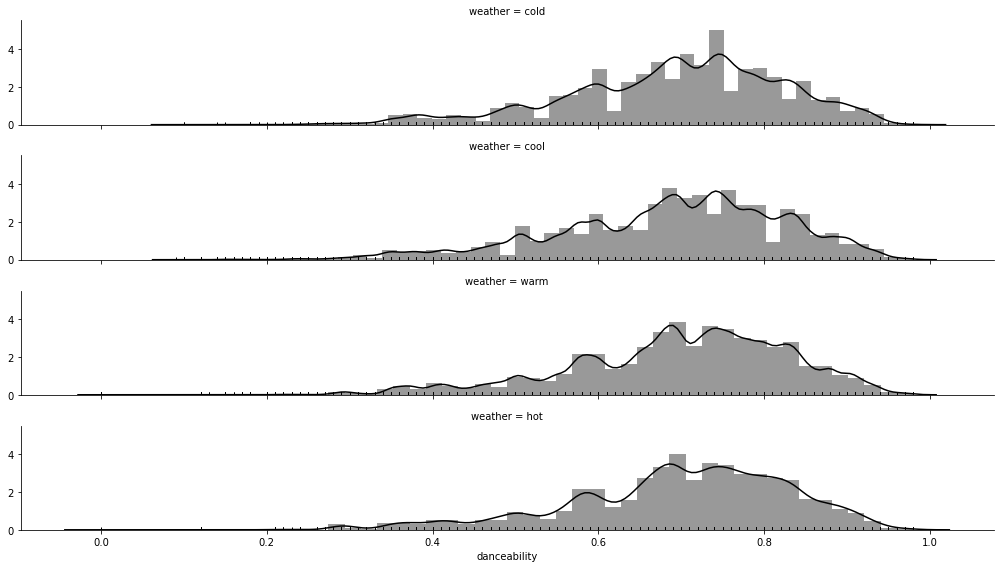

In [261]:
g = sns.FacetGrid(data, row="weather",
                  height=2, aspect=7)
g.map(sns.distplot, "danceability", hist=True, rug=True, color = 'black')

решил посмотреть парное распределение. Здесь видно , что на всех 4х графиках , распределение схожее, и никаких принципиально различий нет. Я взял погоду(некоторые более общий параметр погоды чем облачность, снег и тд ), и один из параметров музыки. можно сделать вывод , о независимости погоды и музыкальных параметров, что было видно и в корреляционой матрице выше. 

<AxesSubplot:xlabel='danceability', ylabel='weather'>

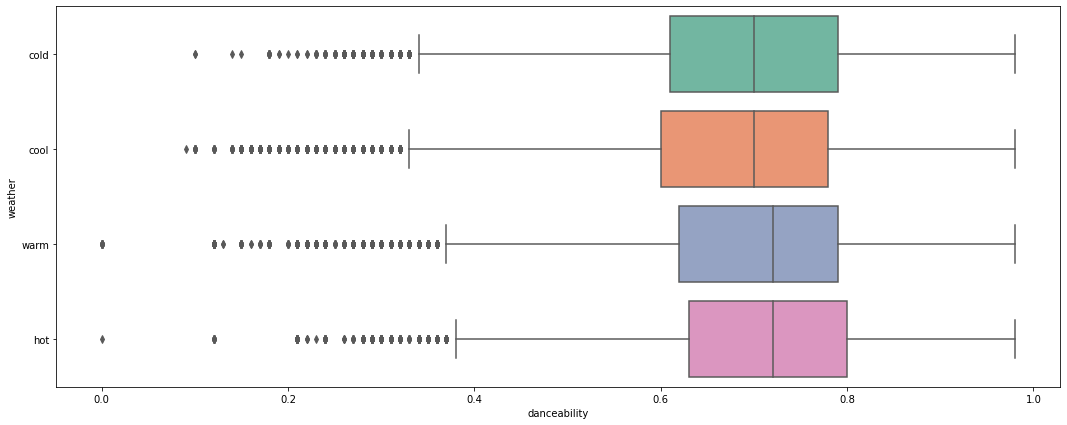

In [26]:
plt.figure(figsize=(18,7))
sns.boxplot(y="weather", x="danceability", data = data , orient="h", palette = 'Set2')

также построил ящики с усами (boxplot) для парного. Здесь видны промахи и основное разспределение. Кстати, здесь тоже можно увидеть , что распределения похожи.Та же медиана почти на одном уровне.  Если бы они находились в разных местах , можно было бы сказать, что величины различаются в зависимости от температуры, но как мы видим - нет. 

Подводя итог по промежуточной проведенной работе, можно заключить, что пока зависимостей между показателями музыки и погоды 
не выявлены. В описании к данным было написано, что создатель всегда думал, что музыка влияет на его конкретный выбор. 

In [259]:
alpha = 0.05
st = shapiro(data['danceability'])
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha])) 

Distributions is normal



Распределение действительно нормальное у данного параметра.

In [260]:
alpha = 0.05
st = shapiro(data[data['weather'] == 'cold']['danceability'])
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha])) 
st = shapiro(data[data['weather'] == 'cool']['danceability'])
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha])) 
st = shapiro(data[data['weather'] == 'warm']['danceability'])
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha])) 
st = shapiro(data[data['weather'] == 'hot']['danceability'])
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha])) 

Distributions is not normal

Distributions is normal

Distributions is normal

Distributions is not normal



Распределения с разделениям по погоде часть норм. часть не норм. Хотя в целом , выглядит они близко к нормальному.(ниже)

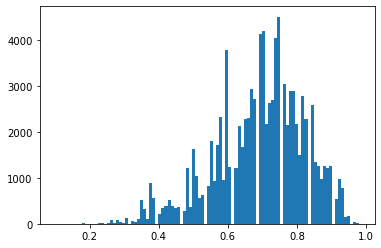

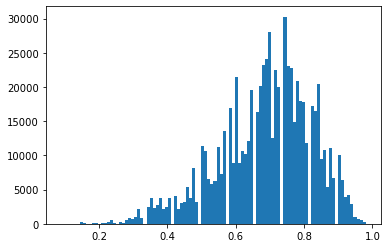

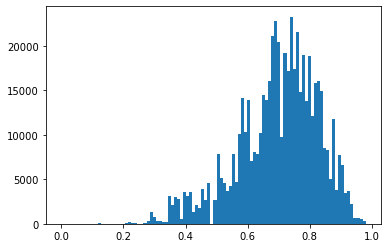

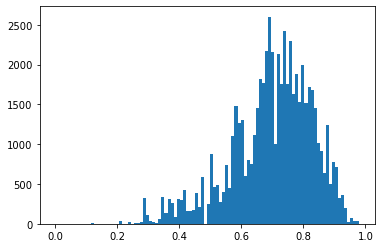

In [62]:
hist_cold = plt.hist(data[data['weather'] == 'cold']['danceability'],bins=100)
plt.show(hist_cold)
hist_cool = plt.hist(data[data['weather'] == 'cool']['danceability'],bins=100)
plt.show(hist_cool)
hist_warm = plt.hist(data[data['weather'] == 'warm']['danceability'],bins=100)
plt.show(hist_warm)
hist_hot = plt.hist(data[data['weather'] == 'hot']['danceability'],bins=100)
plt.show(hist_hot)

In [270]:
alpha = 0.05
st = f_oneway(data[data['weather'] == 'cold']['danceability'],data[data['weather'] == 'hot']['danceability'], data[data['weather'] == 'warm']['danceability'],data[data['weather'] == 'cool']['danceability'])
print('means are {}equal\n'.format( {True:'not ',
False:''}[st[1] < alpha])) 


means are equal



Был выбран тест f_oneway , тк его можно использовать для нескольких групп. Ho берется что мат ожидания у всех групп равны. Приведенный ниже ручной расчет подтверждает правильность выбора теста и его результата. 


In [156]:
print(data[data['weather'] == 'hot']['danceability'].mean())
print(data[data['weather'] == 'warm']['danceability'].mean())
print(data[data['weather'] == 'cool']['danceability'].mean())
print(data[data['weather'] == 'cold']['danceability'].mean())

0.6995480188600943
0.6985696059469205
0.687207897646843
0.6936400707935008


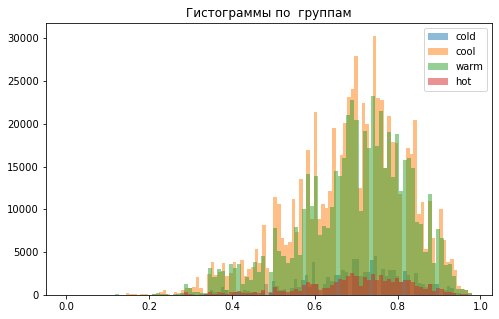

In [267]:
plt.figure(figsize=(8,5))
plt.hist(data[data['weather'] == 'cold']['danceability'].values, bins=100, alpha=0.5, label='cold')
plt.hist(data[data['weather'] == 'cool']['danceability'].values, bins=100, alpha=0.5, label='cool')
plt.hist(data[data['weather'] == 'warm']['danceability'].values, bins=100, alpha=0.5, label='warm')
plt.hist(data[data['weather'] == 'hot']['danceability'].values, bins=100, alpha=0.5, label='hot')
plt.legend(loc='upper right')
plt.title("Гистограммы по  группам")
plt.show()


In [256]:
st = levene(data[data['weather'] == 'cold']['danceability'],data[data['weather'] == 'cool']['danceability'],data[data['weather'] == 'warm']['danceability'],data[data['weather'] == 'hot']['danceability'])
print('Vars is {}equal\n'.format( {True:'not ', False:''}[st[1] < alpha]))

Vars is equal



данный критерий был выбран, потому как можно сравнить больше 2х групп, и он менее чувствителен к нормальному распределению.

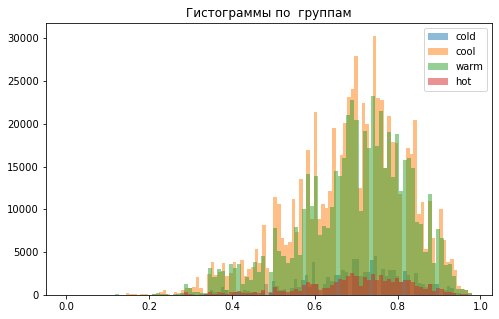

In [268]:
plt.figure(figsize=(8,5))
plt.hist(data[data['weather'] == 'cold']['danceability'].values, bins=100, alpha=0.5, label='cold')
plt.hist(data[data['weather'] == 'cool']['danceability'].values, bins=100, alpha=0.5, label='cool')
plt.hist(data[data['weather'] == 'warm']['danceability'].values, bins=100, alpha=0.5, label='warm')
plt.hist(data[data['weather'] == 'hot']['danceability'].values, bins=100, alpha=0.5, label='hot')
plt.legend(loc='upper right')
plt.title("Гистограммы по  группам")
plt.show()

наглядная иллюстрация равенства мат. ожиданий и дисперсий.

In [257]:
print(data[data['weather'] == 'hot']['danceability'].var())
print(data[data['weather'] == 'warm']['danceability'].var())
print(data[data['weather'] == 'cool']['danceability'].var())
print(data[data['weather'] == 'cold']['danceability'].var())

0.017415185161063405
0.017304957757480918
0.018797617090794666
0.01686272730859545


Таким образом, получаем, что дисперсии и мат.ожидания между группами равны, а из этого следует, что никакой зависимости данного параметра 'danceability' и погоды нет(иначе бы в зависимости от температуры мат. ожидание уж точно смещалось. А это значит, что наша гипотеза о зависимости температуры и параметра музыки отвергается.
